## Import Dependencies and libraries

In [1]:
import numpy as np
import glob
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import datetime, calendar
import pandas as pd

# Reading septentrio file and concatenate

In [2]:
root = tk.Tk()
root.withdraw()
#chose day folder 
file_path = filedialog.askdirectory()

In [3]:
path = file_path+'/*.ismr'
files = glob.glob(path)
files

['/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008A.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008B.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008C.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008D.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008E.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008F.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008G.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008H.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008I.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008J.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008K.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008L.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008M.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008N.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008O.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/SEPT008P.19_.ismr',
 '/media/bhuvi/Analysis/GNSS/2019/19008/

In [4]:
year=int(file_path[-10:-6])
DAY_OF_YEAR = int(file_path[-3:])
d=datetime.date(year, 1, 1) + datetime.timedelta(DAY_OF_YEAR - 1)
d

datetime.date(2019, 1, 8)

### Checking if all files exist

In [5]:
import os.path
import string
Folder_name= file_path[-5:]
print('Checking Folder: '+ Folder_name)
for filename in os.listdir(file_path):
    if filename.startswith(tuple("SEPT{doy}{hour_chr}.{year}_.ismr".format(doy=file_path[-3:],hour_chr=chr(i),year=file_path[-5:-3])  for i in range(65,91))) :
        print(filename +"=> File exist")
    else:
        print ("=X> File not exist")
        
        
        #print(filename)


Checking Folder: 19008
SEPT008A.19_.ismr=> File exist
SEPT008B.19_.ismr=> File exist
SEPT008C.19_.ismr=> File exist
SEPT008D.19_.ismr=> File exist
SEPT008E.19_.ismr=> File exist
SEPT008F.19_.ismr=> File exist
SEPT008G.19_.ismr=> File exist
SEPT008H.19_.ismr=> File exist
SEPT008I.19_.ismr=> File exist
SEPT008J.19_.ismr=> File exist
SEPT008K.19_.ismr=> File exist
SEPT008L.19_.ismr=> File exist
SEPT008M.19_.ismr=> File exist
SEPT008N.19_.ismr=> File exist
SEPT008O.19_.ismr=> File exist
SEPT008P.19_.ismr=> File exist
SEPT008Q.19_.ismr=> File exist
SEPT008R.19_.ismr=> File exist
SEPT008S.19_.ismr=> File exist
SEPT008T.19_.ismr=> File exist
SEPT008U.19_.ismr=> File exist
SEPT008V.19_.ismr=> File exist
SEPT008W.19_.ismr=> File exist
SEPT008X.19_.ismr=> File exist


### Concatination of files

In [6]:
with open("concated_{Folder_name}.ismr".format(Folder_name=file_path[-5:]), "w") as outfile:
    for filename in files:
        with open(filename) as infile:
            contents = infile.read()
            outfile.write(contents)


In [7]:
!pwd

/home/bhuvi/PhD_Docs/Processings/ISMR_Processing


# ISMR Data Processing

In [8]:
#import ismrpy


#data = ismrpy.read_ismr(filename = "/home/bhuvi/PhD_Docs/concated_21011.ismr",lat='22.5286469',lon='75.9236699',addition=True, Ipp=350, skiprows=None)

In [9]:
#data= pd.read_csv("concated_19008.ismr",header=None) #import concated file of the day

In [10]:
data= pd.read_csv("concated_{Folder_name}.ismr".format(Folder_name=file_path[-5:]),header=None) #import concated file of the day

In [11]:
data.columns=['WN','TOW','SVID', 'Value', 'Azimuth', 'Elevation', 'Sig1', 'Total_S4_Sig1',
       'Correction_total_S4_Sig1', 'Phi01_Sig1_1', 'Phi03_Sig1_3',
       'Phi10_Sig1_10', 'Phi30_Sig1_30', 'Phi60_Sig1_60',
       'AvgCCD_Sig1_average_code-carrier_divergence',
       'SigmaCCD_Sig1_standard_deviation_code-carrier_divergence',
       'TEC_TOW-45s', 'dTEC_TOW-60s_TOW-45s', 'TEC_TOW-30s',
       'dTEC_TOW-45s_TOW-30s', 'TEC_TOW-15s', 'dTEC_TOW-30s_TOW-15s',
       'TEC_TOW', 'dTEC_TOW-15s_TOW', 'Sig1_lock_time',
       'sbf2ismr_version_number', 'Lock_time_second_frequency_TEC',
       'Averaged_C/N0_second_frequency_TEC_computation', 'SI_Index_Sig1',
       'SI_Index_Sig1_numerator', 'p_Sig1_spectral_slope', 'Average_Sig2_C/N0',
       'Total_S4_Sig2', 'Correction_total_S4_Sig2', 'Phi01_Sig2_1',
       'Phi03_Sig2_3', 'Phi10_Sig2_10', 'Phi30_Sig2_30', 'Phi60_Sig2_60',
       'AvgCCD_Sig2_average_code-carrier_divergence', 'SigmaCCD_Sig2_standard',
       'Sig2_lock', 'SI_Index_Sig2', 'SI_Index_Sig2_numerator', 'p_Sig2_phase',
       'Average_Sig3_C/N0_last_minute', 'Total_S4_Sig3',
       'Correction_total_S4_Sig3', 'Phi01_Sig3_1_phase', 'Phi03_Sig3_3_phase',
       'Phi10_Sig3_10_phase', 'Phi30_Sig3_30_phase', 'Phi60_Sig3_60_phase',
       'AvgCCD_Sig3_average_code-carrier_divergence',
       'SigmaCCD_Sig3_standard_deviation_code-carrier_divergence',
       'Sig3_lock_time', 'SI_Index_Sig3', 'SI_Index_Sig3_numerator',
       'p_Sig3_phase', 'T_Sig1_phase', 'T_Sig2_phase', 'T_Sig3_phase']

In [12]:
##some functions
def PRN_X(x):
    sv = 'M' + str(x)
    if 0 < x < 38:
        sv = 'G' + str(x)
    elif 37 < x < 62:
        sv = 'R' + str(x)
    elif 70 < x < 107:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'E' + str(x)
    elif 119 < x < 139:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'S' + str(x)
    elif 140 < x < 177:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'C' + str(x)
    elif 181 < x < 187:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'J' + str(x)
    return sv


###==============================================###
###
def WN_TOWtoTIME(WN, TOW):
    """"
    Convert gpsweek and gpseconds to time
    """
    import datetime, calendar
    WN = float(WN)
    TOW = float(TOW)
    # print(gpsweek,gpsseconds)
    leapseconds = 0   ####check 
    datetimeformat = "%Y-%m-%d %H:%M:%S"
    epoch = datetime.datetime.strptime("1980-01-06 00:00:00", datetimeformat)
    elapsed = datetime.timedelta(days=(WN * 7), seconds=(TOW))
    # return datetime.datetime.strftime(epoch + elapsed,datetimeformat)
    return elapsed + epoch


In [13]:
data['sv'] = data.SVID.apply(PRN_X)

### Time column manipulation

In [14]:
##Time conversion in UTC
data['Time_UTC']=np.vectorize(WN_TOWtoTIME)(data['WN'],data['TOW'])

##Time conversion in IST
data['Time_IST']=data.Time_UTC+datetime.timedelta(hours=5.5)

##Time conversion in JulianDate
data['JT'] = pd.DatetimeIndex(data['Time_UTC']).floor('d').to_julian_date()




### Elevation cutoff filter for data

In [15]:
data=data[data['Elevation'].astype(float) >=25]
data

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase,sv,Time_UTC,Time_IST,JT
4,2035,172860,13,628,64.0,35.0,45.0,0.066,0.056,0.021,...,nan,nan,nan,0.000047,nan,nan,G13,2019-01-08 00:01:00,2019-01-08 05:31:00,2458491.5
5,2035,172860,15,628,107.0,62.0,50.4,0.037,0.030,0.013,...,nan,nan,nan,0.000023,nan,nan,G15,2019-01-08 00:01:00,2019-01-08 05:31:00,2458491.5
6,2035,172860,20,628,263.0,37.0,44.2,0.089,0.062,0.020,...,nan,nan,nan,0.000046,nan,nan,G20,2019-01-08 00:01:00,2019-01-08 05:31:00,2458491.5
7,2035,172860,21,628,326.0,37.0,45.4,0.043,0.054,0.017,...,nan,nan,nan,0.000039,nan,nan,G21,2019-01-08 00:01:00,2019-01-08 05:31:00,2458491.5
10,2035,172860,29,628,122.0,84.0,52.0,0.026,0.025,0.011,...,nan,nan,nan,0.000014,nan,nan,G29,2019-01-08 00:01:00,2019-01-08 05:31:00,2458491.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44593,2035,259200,123,628,249.0,34.0,42.5,0.067,0.075,0.036,...,nan,nan,nan,0.000143,0.000129,nan,S23,2019-01-09 00:00:00,2019-01-09 05:30:00,2458492.5
44594,2035,259200,127,628,225.0,55.0,47.0,0.047,0.045,0.064,...,nan,nan,nan,0.000108,0.000120,nan,S27,2019-01-09 00:00:00,2019-01-09 05:30:00,2458492.5
44595,2035,259200,128,628,162.0,63.0,49.7,0.029,0.033,0.164,...,nan,nan,nan,0.000196,0.000205,nan,S28,2019-01-09 00:00:00,2019-01-09 05:30:00,2458492.5
44597,2035,259200,132,628,140.0,57.0,41.3,0.086,0.086,0.252,...,nan,nan,nan,0.000567,0.000730,nan,S32,2019-01-09 00:00:00,2019-01-09 05:30:00,2458492.5


# IPP Calculation

In [16]:
from mpl_toolkits.basemap import Basemap

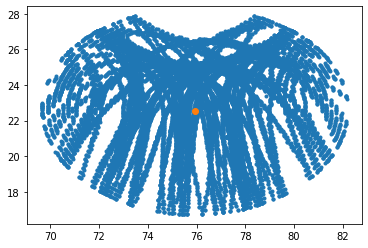

In [17]:
#receiver station location (lat, lon)
lat=22.5286469
lon=75.9236699

#satelite position
ELEV = data.Elevation
AZI = data.Azimuth

#constant values
RE = 6378.1363 * 10 ** 3  # Earth radius in meter
IPP = 350 * 10 ** 3       #ionosphere hight in meter
######################
E = np.deg2rad(ELEV)
A = np.deg2rad(AZI)
PHI_U = np.deg2rad(lat)
LAMBDA_U = np.deg2rad(lon)
Iono_ht = ((RE / (RE + IPP)) * np.cos(E))
Shi_pp = (np.pi / 2) - E - np.arcsin(Iono_ht)
# % ---------------------------Satellite latitude and IPP Lat calculation
Phi_pp = np.arcsin(np.sin(PHI_U) * np.cos(Shi_pp) + np.cos(PHI_U) * np.sin(Shi_pp) * np.cos(A))
DLat_PP = np.rad2deg(Phi_pp)
# %---------------------- Satellite longitude calculation
TERM2 = ((np.sin(Shi_pp) * np.sin(A)) / np.cos(Phi_pp))
Lambda_pp = LAMBDA_U + np.arcsin(TERM2)
DLong_PP = np.rad2deg(Lambda_pp)

data['Dlat_IPP'] = DLat_PP
data['Dlong_IPP'] = DLong_PP


fig_size = [6, 6]
plt.rcParams['figure.figsize'] = fig_size

#ipp plot
plt.plot(DLong_PP,DLat_PP,'.')
plt.plot(lon,lat,'o')




# Categorizing

In [18]:
data_gps = data.loc[data['SVID'].between(1,37,inclusive =True)]

data_glonass = data.loc[data['SVID'].between(38,61,inclusive =True)]

data_gallileo = data.loc[data['SVID'].between(71,106,inclusive =True)]


data_SBAS = data.loc[data['SVID'].between(120,138,inclusive =True)]


data_compass = data.loc[data['SVID'].between(140,176,inclusive =True)]


data_Qzss = data.loc[data['SVID'].between(181,187,inclusive =True)]

/tmp/ipykernel_73405/2991110376.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_gps = data.loc[data['SVID'].between(1,37,inclusive =True)]
/tmp/ipykernel_73405/2991110376.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_glonass = data.loc[data['SVID'].between(38,61,inclusive =True)]
/tmp/ipykernel_73405/2991110376.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_gallileo = data.loc[data['SVID'].between(71,106,inclusive =True)]
/tmp/ipykernel_73405/2991110376.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_SBAS = data.loc[data['SVID'].between(120,138,inclusive =True)]
/tmp/ipykernel_73405/2991110376.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neit

# Scintillation Index

In [22]:
svid=eval(maxima['SVID'].to_string(index=False))
svid

9

(array([17904.41666667, 17904.4375    , 17904.45833333, 17904.47916667,
        17904.5       , 17904.52083333, 17904.54166667, 17904.5625    ,
        17904.58333333, 17904.60416667]),
 [Text(17904.416666666668, 0, '08 10:00'),
  Text(17904.4375, 0, '08 10:30'),
  Text(17904.458333333332, 0, '08 11:00'),
  Text(17904.479166666668, 0, '08 11:30'),
  Text(17904.5, 0, '08 12:00'),
  Text(17904.520833333332, 0, '08 12:30'),
  Text(17904.541666666668, 0, '08 13:00'),
  Text(17904.5625, 0, '08 13:30'),
  Text(17904.583333333332, 0, '08 14:00'),
  Text(17904.604166666668, 0, '08 14:30')])

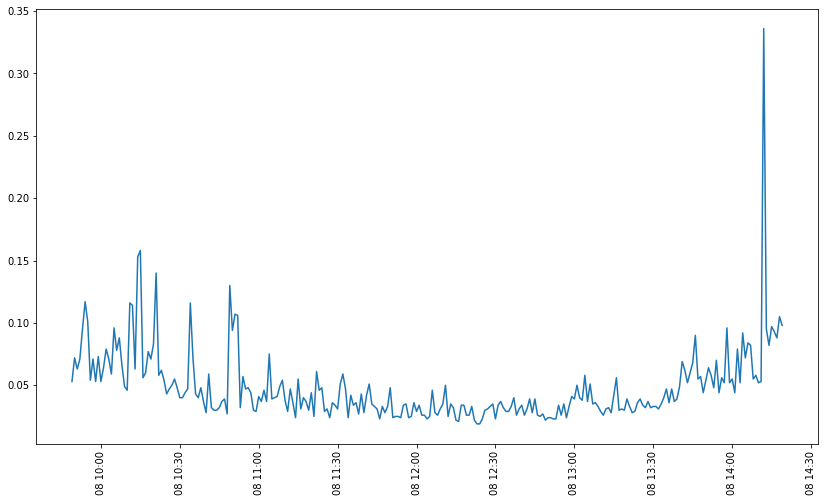

In [23]:
fig_size = [14, 8]
plt.rcParams['figure.figsize'] = fig_size
top_scinti=data_gps[data_gps.SVID==svid]
plt.plot(top_scinti.Time_UTC,top_scinti.Total_S4_Sig1.astype(float))
#plt.xlim(G31.Time(2019,2,13,2,0,0),G31.Time(2019,2,13,4,0,0))
plt.xticks(rotation=90)


In [24]:
data_gps.groupby('SVID')

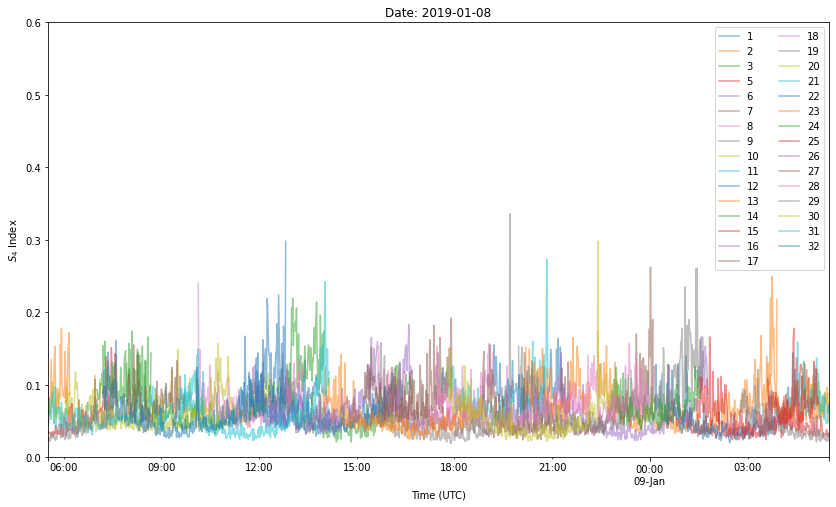

In [25]:
fig_size = [14, 8]
plt.rcParams['figure.figsize'] = fig_size
pd.pivot_table(data_gps.reset_index(),
                   index='Time_IST', columns='SVID', values='Total_S4_Sig1'
                  ).plot(ylim=(0.0,0.6),alpha=0.5,title='Date: '+str(d),xlabel='Time (UTC)',ylabel='$S_4$ Index')


array([[<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: x

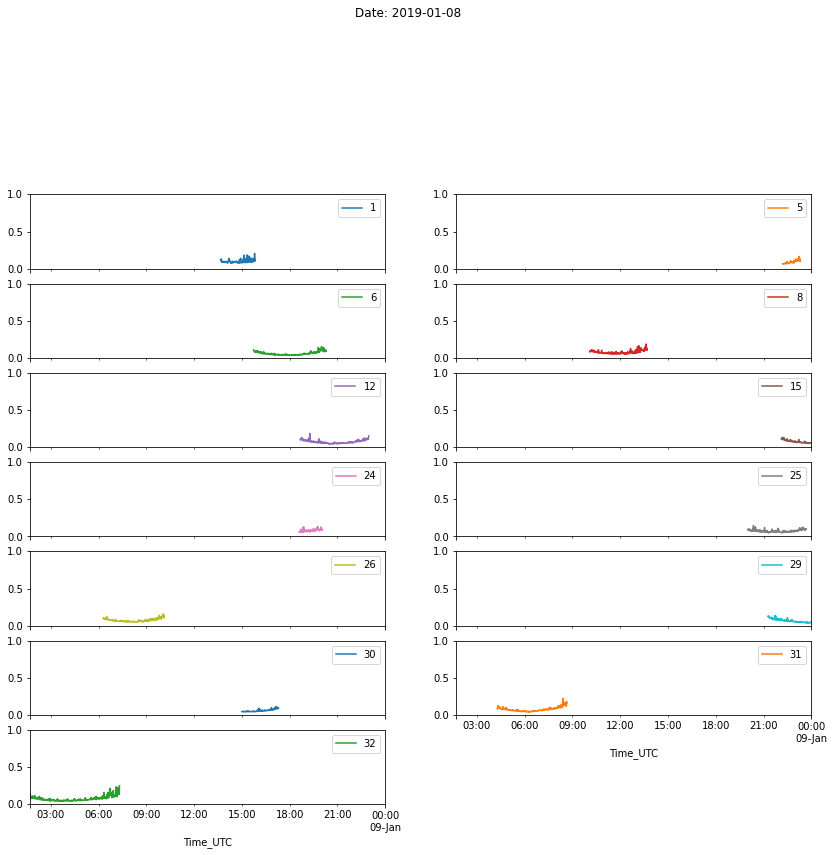

In [28]:
# Larger figure size
fig_size = [14, 26]
plt.rcParams['figure.figsize'] = fig_size
pd.pivot_table(data_gps.reset_index(),
               index='Time_UTC', columns='SVID', values='Total_S4_Sig2'
              ).plot(subplots=True,layout=(16,2),ylim=(0.0,1),title='Date: '+str(d))

array([[<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabe

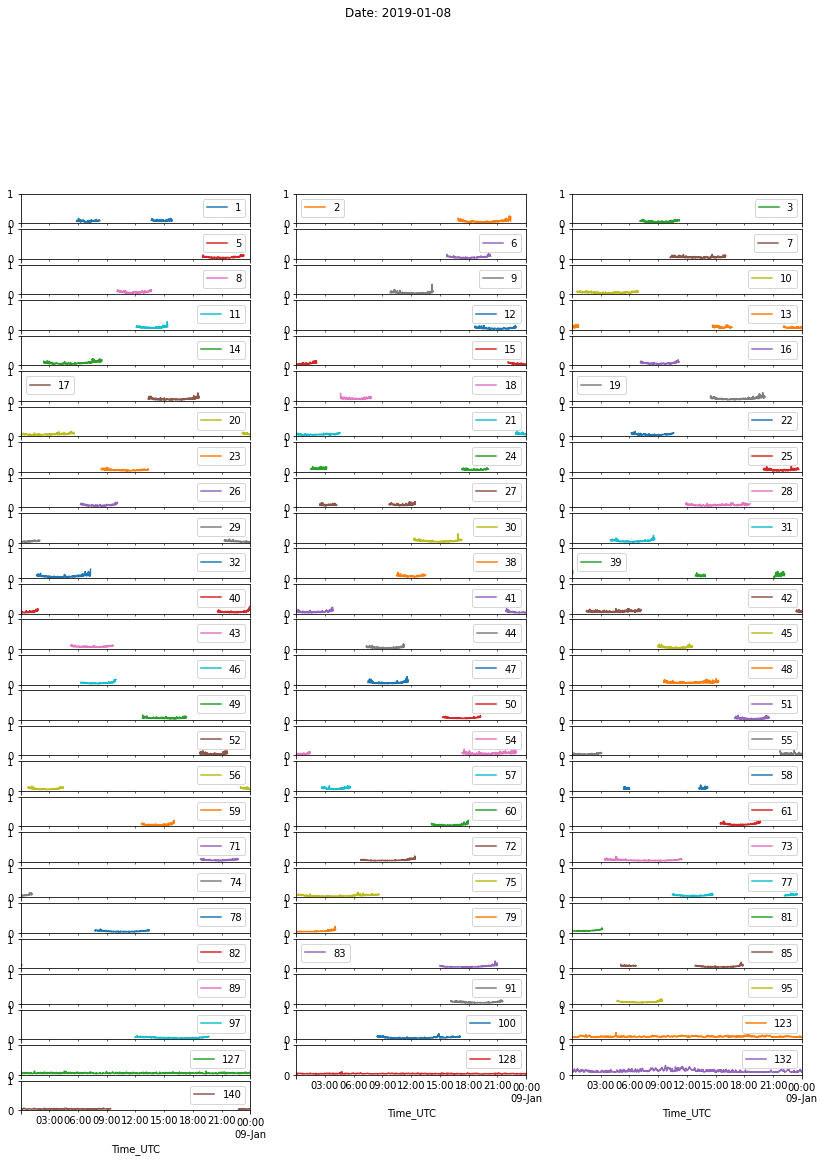

In [29]:
fig_size = [14, 26]
plt.rcParams['figure.figsize'] = fig_size
pd.pivot_table(data.reset_index(),
               index='Time_UTC', columns='SVID', values='Total_S4_Sig1'
              ).plot(subplots=True,layout=(40,3),ylim=(0.0,1),title='Date: '+str(d))

array([[<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabe

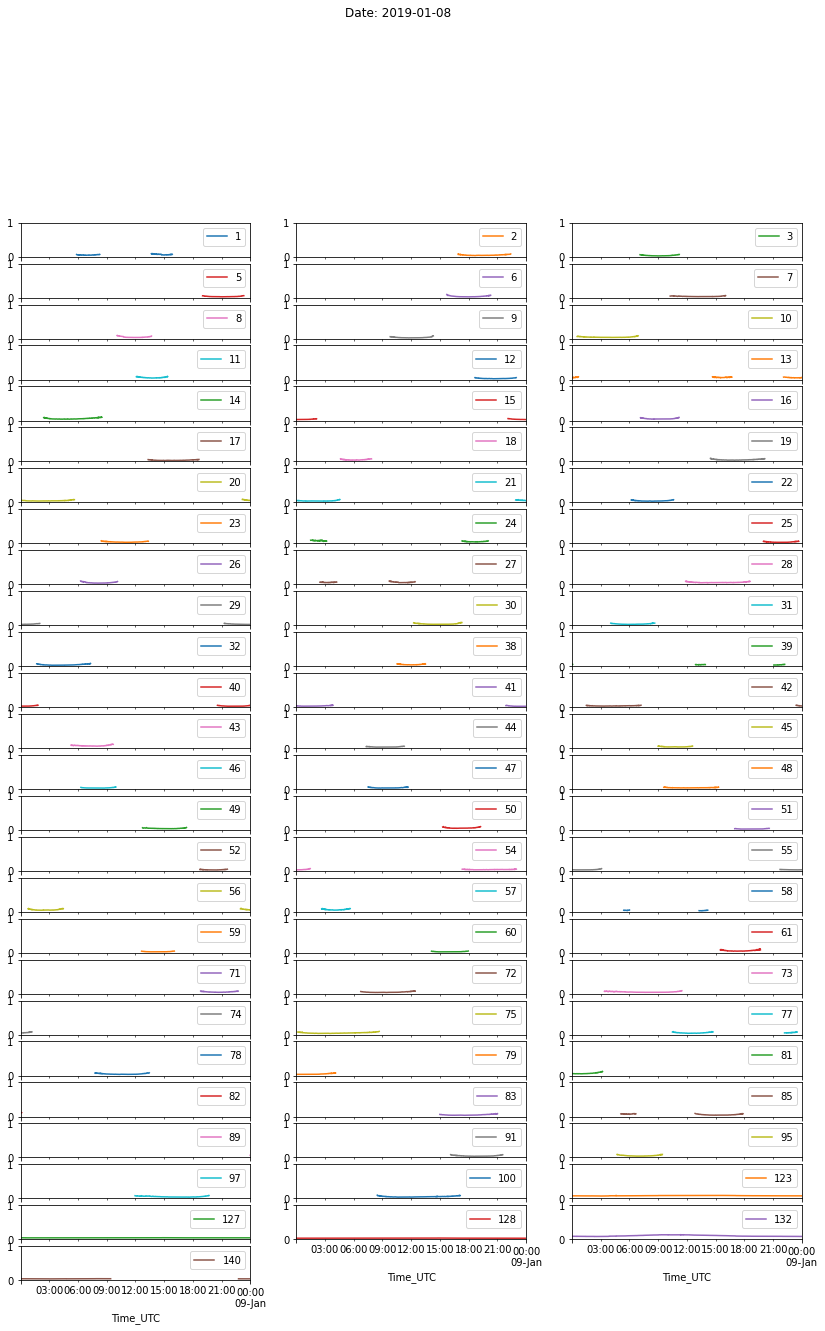

In [30]:
fig_size = [14, 30]
plt.rcParams['figure.figsize'] = fig_size
pd.pivot_table(data.reset_index(),
               index='Time_UTC', columns='SVID', values='Correction_total_S4_Sig1'
              ).plot(subplots=True,layout=(40,3),ylim=(0.0,1),title='Date: '+str(d))

array([[<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>],
       [<AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabel='Time_UTC'>,
        <AxesSubplot: xlabe

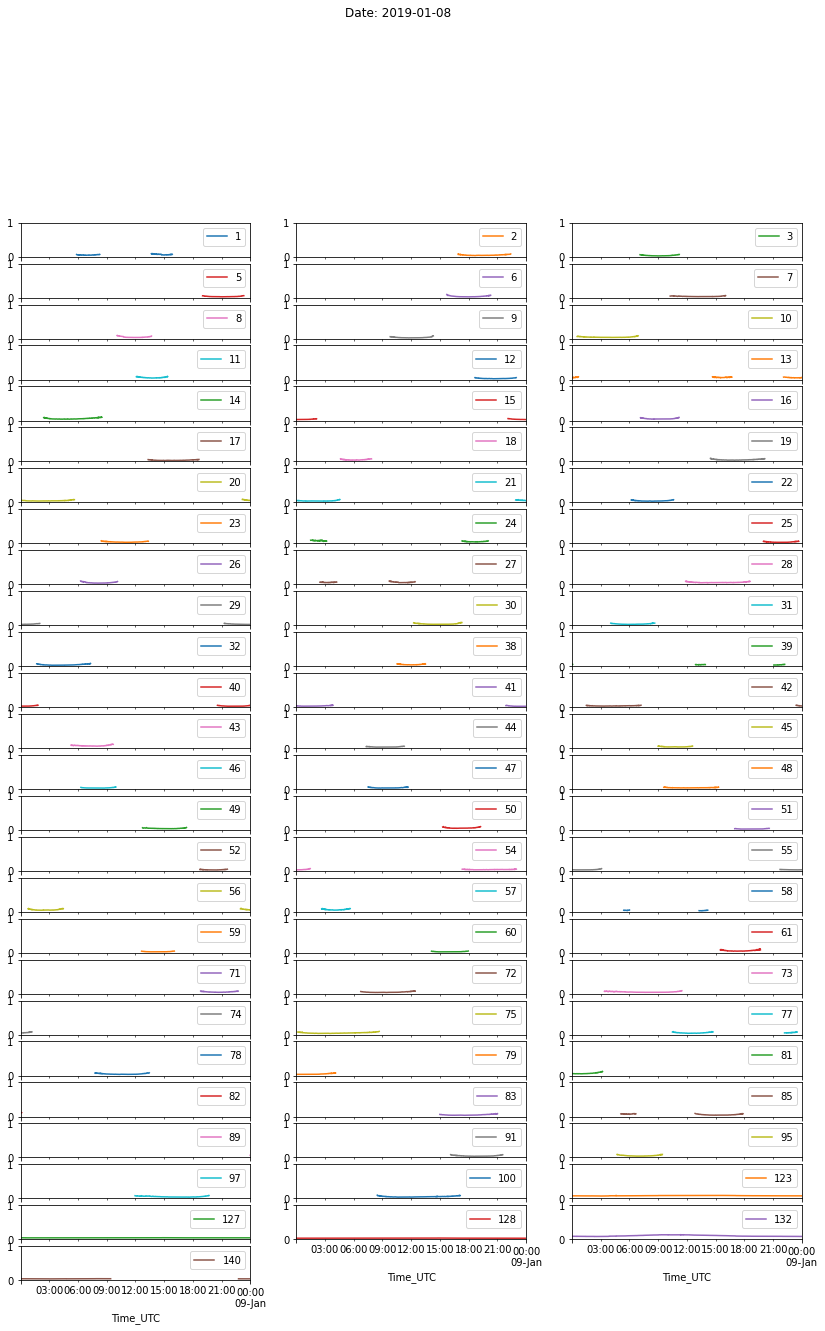

In [31]:
fig_size = [14, 30]
plt.rcParams['figure.figsize'] = fig_size
pd.pivot_table(data.reset_index(),
               index='Time_UTC', columns='SVID', values='Correction_total_S4_Sig1'
              ).plot(subplots=True,layout=(40,3),ylim=(0.0,1),title='Date: '+str(d))

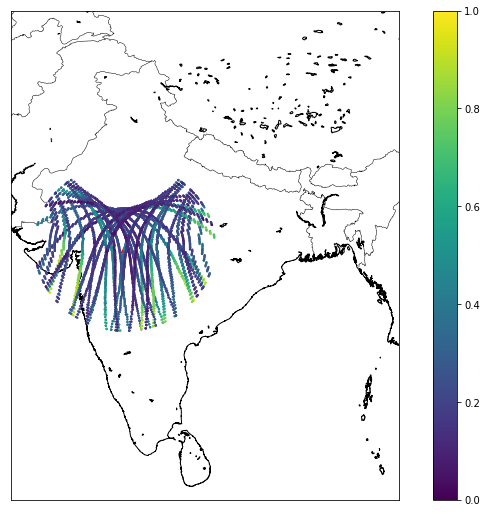

In [34]:
fig = plt.figure(figsize=(12,9))
m = Basemap(projection='cyl',
            llcrnrlat=5,
            urcrnrlat=39,
            llcrnrlon=68,
            urcrnrlon=95,
           resolution='h')

m.drawcoastlines()
m.drawcountries()
m.makegrid(20,20)
m.scatter(data_gps.Dlong_IPP,data_gps.Dlat_IPP,latlon=True, s=5,  linewidth=0.1, zorder=2,c=data_gps.TEC_TOW.astype(float))

m.scatter(75.924,22.528,latlon=True,s=70, marker='^', color='red')
plt.colorbar()